图像颜色直方图处理

In [22]:
# 原始图像地址
img_path="/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/test/disc_small/image/gdrishtiGS_005.png"

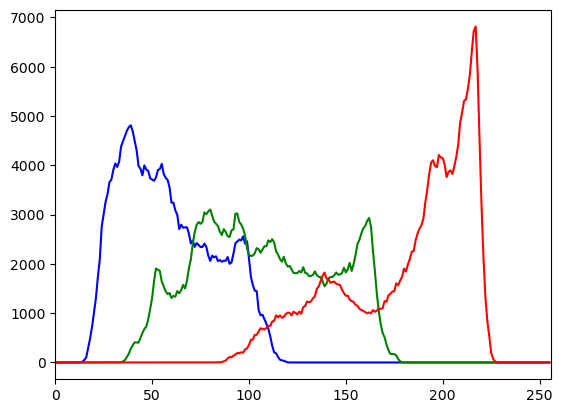

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(img_path)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

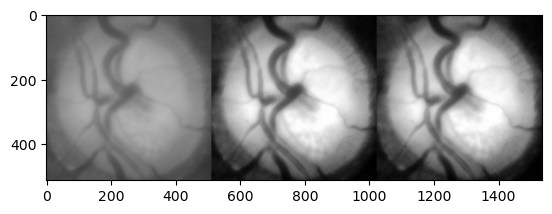

In [24]:
# 灰度图均衡化
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 灰度图均衡化
equ = cv2.equalizeHist(gray)
equ2 = cv2.equalizeHist(equ)
# 水平拼接原图和均衡图
result1 = np.hstack((gray, equ,equ2))
result1 = cv2.cvtColor(result1,cv2.COLOR_RGBA2BGR)
plt.imshow(result1)

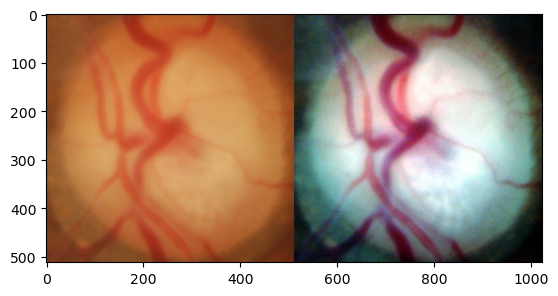

In [25]:
# 彩色图像均衡化,需要分解通道 对每一个通道均衡化
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
# 合并每一个通道
equ2 = cv2.merge((bH, gH, rH))
# 水平拼接原图和均衡图
result2 = np.hstack((img,equ2))
result2 = cv2.cvtColor(result2,cv2.COLOR_RGBA2BGR)
plt.imshow(result2)

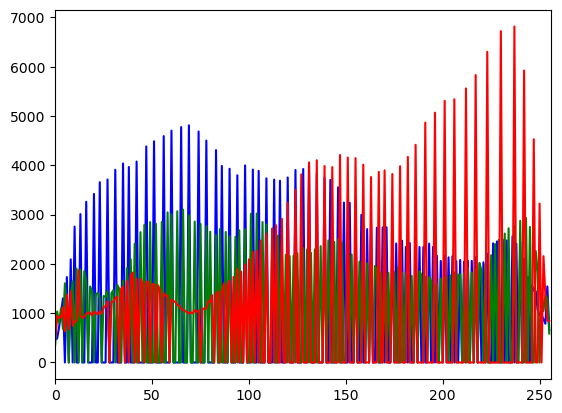

In [26]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([equ2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

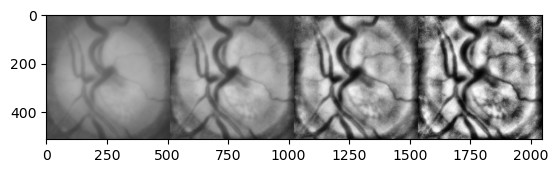

In [27]:
# 自适应均衡化，参数可选
img = cv2.imread(img_path, 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)
cl2 = clahe.apply(cl1)
cl3 = clahe.apply(cl2)
cl1 = np.hstack((img,cl1,cl2,cl3))
cl1 = cv2.cvtColor(cl1,cv2.COLOR_RGBA2BGR)
plt.imshow(cl1)

获取图像中心点坐标
将血管颜色转化为极值--0
将极值点--0替换为以圆心点30°的相同位置的点的值。

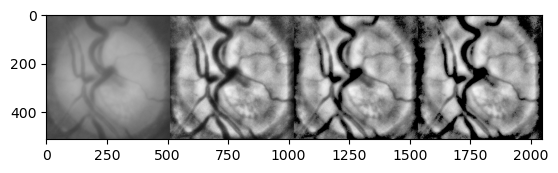

In [28]:
# TOZERO
_,thresh1 = cv2.threshold(cl2,60,255,cv2.THRESH_TOZERO)
_,thresh2 = cv2.threshold(cl2,80,255,cv2.THRESH_TOZERO)
out_imgs=np.hstack((img,cl2,thresh1,thresh2))
out_imgs = cv2.cvtColor(out_imgs,cv2.COLOR_RGBA2BGR)
plt.imshow(out_imgs)


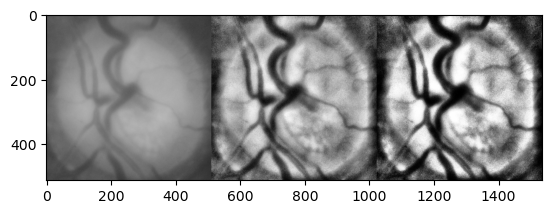

In [29]:
# 直方图---直方图均衡化
equ_cl2 = cv2.equalizeHist(cl2)
out_imgs=np.hstack((img,cl2,equ_cl2))
out_imgs = cv2.cvtColor(out_imgs,cv2.COLOR_RGBA2BGR)
plt.imshow(out_imgs)

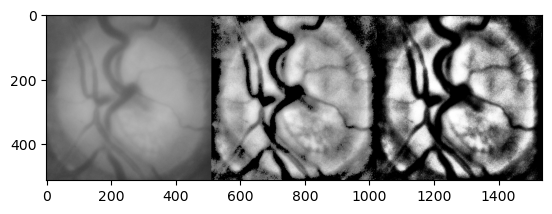

In [30]:
# 直方图---二值化---直方图均衡化
equ_cl_thresh2 = cv2.equalizeHist(thresh2)
out_imgs=np.hstack((img,thresh2,equ_cl_thresh2))
out_imgs = cv2.cvtColor(out_imgs,cv2.COLOR_RGBA2BGR)
plt.imshow(out_imgs)

In [31]:
# 方法--plt显示图片
def plt_show(imgs_tuple):
    out_imgs=np.hstack(imgs_tuple)
    out_imgs = cv2.cvtColor(out_imgs,cv2.COLOR_RGBA2BGR)
    plt.imshow(out_imgs)

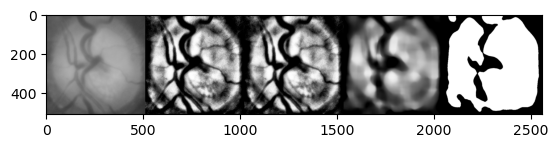

In [32]:
blurred_g = cv2.GaussianBlur(equ_cl_thresh2, (3, 3),0)
blurred_m = cv2.medianBlur(equ_cl_thresh2, 55)
_,thresh3 = cv2.threshold(blurred_m,50,255,cv2.THRESH_BINARY)

imgs_tuple=(img,equ_cl_thresh2,blurred_g,blurred_m,thresh3)
plt_show(imgs_tuple)

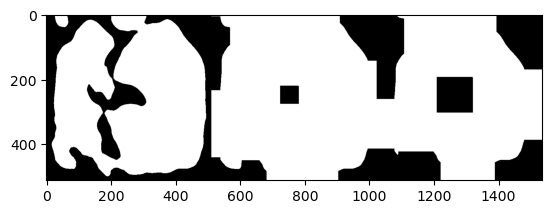

In [33]:
# 腐蚀膨胀
kernel = np.ones((55, 55), np.uint8)
closing = cv2.morphologyEx(thresh3, cv2.MORPH_CLOSE, kernel)
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (55, 55))
dst = cv2.dilate(thresh3, kernel1)
dst = cv2.erode(dst, kernel1)
dst = cv2.erode(dst, kernel1)
plt_show((thresh3,closing,dst))

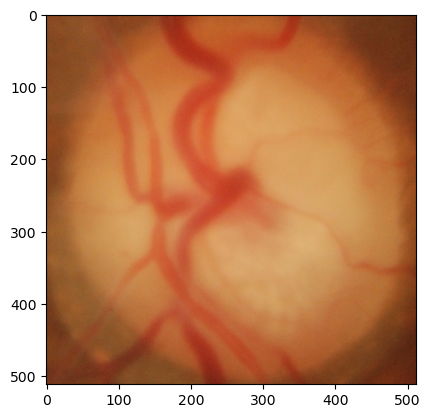

In [34]:
img = cv2.imread(img_path)

plt_show((img,))

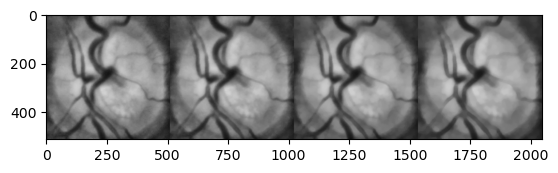

In [35]:
b,green_fundus,r = cv2.split(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_green_fundus = clahe.apply(green_fundus)

# applying alternate sequential filtering (3 times closing opening)
r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
f5 = clahe.apply(f4)	
plt_show((r1,R1,r2,R2))


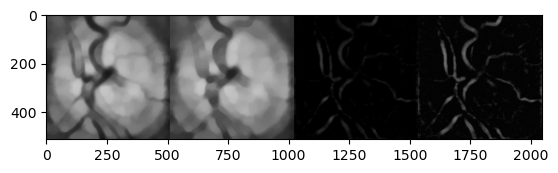

In [36]:
plt_show((r3,R3,f4,f5))